In [1]:
# importul bibliotecilor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Importul si analiza datelor

In [19]:
# Importul fisierului cu date 'data_simple.csv' 
df = pd.read_csv('data_simple.csv', index_col=0)

In [20]:
df

,radius_mean,texture_mean,diagnosis
0,17.99,10.38,M
1,20.57,17.77,M
2,19.69,21.25,M
3,11.42,20.38,M
4,20.29,14.34,M
...,...,...,...
564,21.56,22.39,M
565,20.13,28.25,M
566,16.60,28.08,M
567,20.60,29.33,M


In [31]:
#vizualizarea informatie despre date (info())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   radius_mean   569 non-null    float64
 1   texture_mean  569 non-null    float64
 2   diagnosis     569 non-null    object 
dtypes: float64(2), object(1)
memory usage: 17.8+ KB


In [32]:
# vizualizarea descrierii statistice a datelor (describe())
df.describe()

,radius_mean,texture_mean
count,569.000000,569.000000
mean,14.127292,19.289649
std,3.524049,4.301036
min,6.981000,9.710000
25%,11.700000,16.170000
50%,13.370000,18.840000
75%,15.780000,21.800000
max,28.110000,39.280000


In [30]:
#vizualizarea numarului de clase din coloana label (value_counts())
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

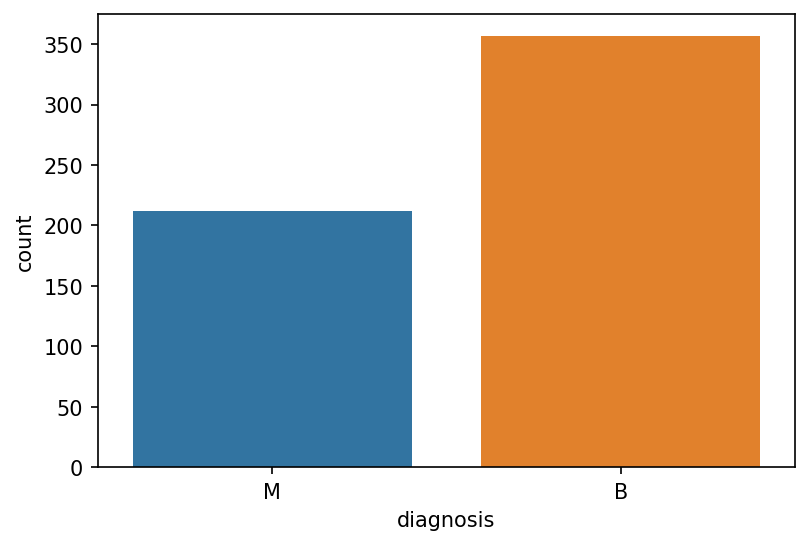

In [34]:
# vizualiazarea grafica a numarul de valori in fiecare clasa a coloanei eticheta (countplot)
plt.figure(dpi=150)
sns.countplot(data=df, x = 'diagnosis')

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

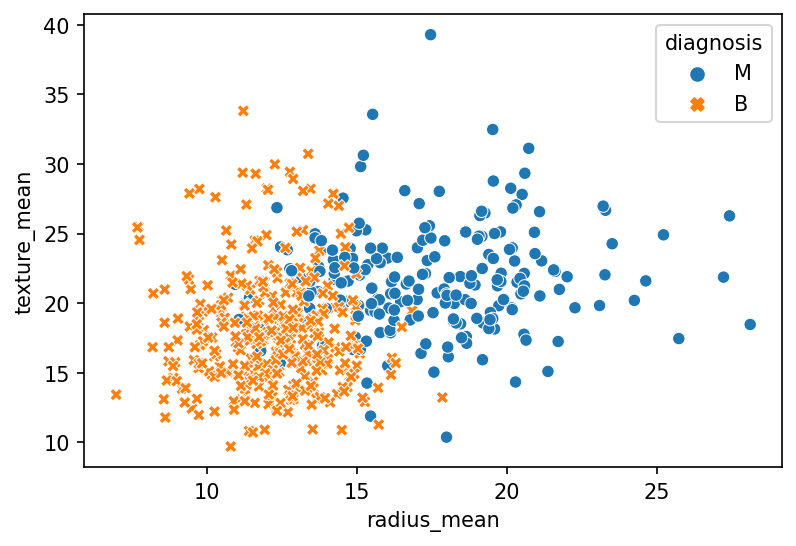

In [25]:
# vizualizarea grupării claselor in funcție de 2 caracteristici  (scatterplot())
plt.figure(dpi=150)
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue = 'diagnosis', style = "diagnosis")

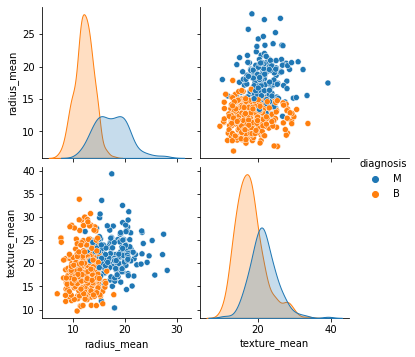

In [29]:
# vizuazlizarea pozitionarii distributiei punctelor in planul de caracteristici (pairplot())
sns.pairplot(data=df, hue = 'diagnosis');

# 2. Crearea modelului de baza

In [35]:
# crearea setului X si y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [36]:
# crearea seturilor de train si de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [37]:
# Scalarea datelor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scalat = scaler.fit_transform(X_train)
X_test_scalat = scaler.transform(X_test)

In [38]:
# Importul si crearea modelului knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [39]:
# ajustarea modelului pe datele de training
model.fit(X_train_scalat, y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
# realizarea predicitei pe datele de test
y_pred = model.predict(X_test_scalat)
y_pred

array(['M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [41]:
# determinarea acurateti modelului
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8771929824561403

In [42]:
# determinarea confusion matrix a modelului
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[66,  8],
       [ 6, 34]], dtype=int64)

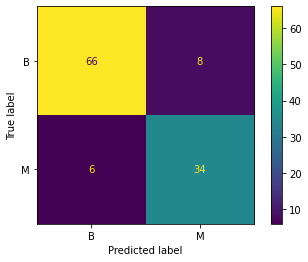

In [43]:
# vizualizarea grafica a confusion matrix a modelului
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_scalat, y_test)

In [44]:
# elaborarea classificasion report a modelului
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.92      0.89      0.90        74
           M       0.81      0.85      0.83        40

    accuracy                           0.88       114
   macro avg       0.86      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



# 3. Selectarea valorii K prin metoda "cotului"

In [46]:
# crearea unei liste goale ce va pastra valorile erorilor
test_error_rates = []

In [47]:
# crearea unie bucle for ce permite crearea, ajustarea, predictia si determinarea erori pentru diferiti K 
for k in range(1,30):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scalat, y_train)
    
    y_pred = model.predict(X_test_scalat)
    
    test_error = 1-accuracy_score(y_test, y_pred)
    test_error_rates.append(test_error)

In [49]:
test_error_rates

[0.1228070175438597,
 0.0964912280701754,
 0.13157894736842102,
 0.14035087719298245,
 0.14035087719298245,
 0.13157894736842102,
 0.14035087719298245,
 0.13157894736842102,
 0.13157894736842102,
 0.13157894736842102,
 0.14035087719298245,
 0.13157894736842102,
 0.14035087719298245,
 0.14035087719298245,
 0.14035087719298245,
 0.13157894736842102,
 0.13157894736842102,
 0.13157894736842102,
 0.13157894736842102,
 0.13157894736842102,
 0.13157894736842102,
 0.13157894736842102,
 0.1228070175438597,
 0.1228070175438597,
 0.1228070175438597,
 0.1228070175438597,
 0.1228070175438597,
 0.1228070175438597,
 0.11403508771929827]

Text(0.5, 0, 'valoare lui K')

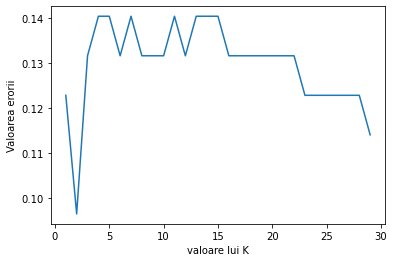

In [48]:
# afisarea grafica a dependentei erorii de valoarea k
plt.plot(range(1,30), test_error_rates)
plt.ylabel("Valoarea erorii")
plt.xlabel("valoare lui K")

Se selecteaza valoare minima a lui K ce asigura o vaoarea minima a erorii adica k=2

# 4. Selectarea valorii K prin cross validation

In [52]:
# crearea unui model KNN implicit
knn=KNeighborsClassifier()

In [53]:
# vizuazlizarea liste de hiper parametri ai modelului (get_params().keys())
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [51]:
# crearea unui obiect de scalare implicit
scaler=StandardScaler()

In [54]:
# creara unei liste cu tupluri cu doua elemente - denumirea (string) si obiectul procesului ce se vor include in pipeline
operations = [('scaler', scaler), ('knn', knn)]

In [61]:
# importul si creara unui obiect pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [62]:
# creara unei liste cu valorile lui K
k_values = list(range(1,20))

In [66]:
# crearea unui disctionar cu hiperparametrii ce vor fi variati in obiectul pipeline (chile fac referinta si la procese din pipeline)
param_grid = {'knn__n_neighbors': k_values,
              'knn__metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']}

In [67]:
# crearea modelului gridsearch
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')

In [68]:
# ajustarea modelului pe datele de training fara scalare
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__n_neighbors=3; total time=   0.0s
[CV] END ..........knn__metric=minkowski, knn__

[CV] END ..........knn__metric=euclidean, knn__n_neighbors=4; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=5; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=5; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=5; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=5; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=5; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=6; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=6; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=6; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=6; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=6; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=7; total time=   0.0s
[CV] END ..........knn__metr

[CV] END ..........knn__metric=manhattan, knn__n_neighbors=8; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=8; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=9; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=9; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=9; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=9; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=9; total time=   0.0s
[CV] END .........knn__metric=manhattan, knn__n_neighbors=10; total time=   0.0s
[CV] END .........knn__metric=manhattan, knn__n_neighbors=10; total time=   0.0s
[CV] END .........knn__metric=manhattan, knn__n_neighbors=10; total time=   0.0s
[CV] END .........knn__metric=manhattan, knn__n_neighbors=10; total time=   0.0s
[CV] END .........knn__metric=manhattan, knn__n_neighbors=10; total time=   0.0s
[CV] END .........knn__metri

[CV] END .........knn__metric=chebyshev, knn__n_neighbors=11; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=11; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=11; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=11; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=12; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=12; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=12; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=12; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=12; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=13; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=13; total time=   0.0s
[CV] END .........knn__metric=chebyshev, knn__n_neighbors=13; total time=   0.0s
[CV] END .........knn__metri

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['minkowski', 'euclidean', 'manhattan',
                                         'chebyshev'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=2)

In [70]:
# verificare celor mai buni hiperparametri ai pipeline
grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [71]:
# realizarea predicitei pe datele de test fara scalare
y_pred = grid_model.predict(X_test)
y_pred

array(['M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M'], dtype=object)

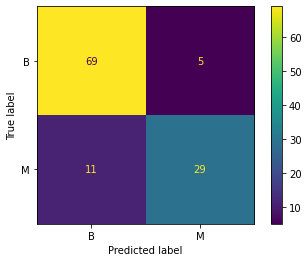

In [72]:
# vizualizarea grafica a confusion matrix a modelului
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_model, X_test, y_test)

In [73]:
# elaborarea classificasion report a modelului
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.86      0.93      0.90        74
           M       0.85      0.72      0.78        40

    accuracy                           0.86       114
   macro avg       0.86      0.83      0.84       114
weighted avg       0.86      0.86      0.86       114

